In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import os
os.getcwd()
path=os.chdir('/content/drive/My Drive/Thesis Model/')

In [ ]:
scenarios = ["base", "No_DoD", "No_FEMA", "No_DoH", "No_ARC", "No_EPA", "No_DoE", "No_Cyb", "No_DoT", "No_DHS", "No_NVOAD", "NO_EMA_SAR", "NO_Army_SAR"]
output_dfs = {}

for scenario in scenarios:
  output_dfs['output_df_data'+scenario] = pd.read_excel('outputs_raw.xlsx', sheet_name='output_df_data'+scenario)
  output_dfs['output_df_states'+scenario] = pd.read_excel('outputs_raw.xlsx', sheet_name='output_df_states'+scenario)
  output_dfs['output_df_sd'+scenario] = pd.read_excel('outputs_raw.xlsx', sheet_name='output_df_sd'+scenario)

In [ ]:
shapes = ['s', 'o', '^', '>', 'v', '<', 'd', 'p', 'h', '8']
colors = [(0, 0, 0), (1, 0, 0), (0, 0.68, 0), (0, 0, 1), (0.5, 0.5, 0.5), (0.95, 0.4, 0),
          (0.9, 0, 0.9), (0.9, 0.9, 0), (0, 0.9, 0.9), (0.68, 0.68, 0), (1, 0.68, 0.68)]
linestyles = ['solid', (0, (5, 5)), (0, (3, 5, 1, 5)), (0, (3, 1, 1, 1)), (0, (1, 1)),
              (0, (5, 10)), (0, (5, 1)), (0, (3, 5, 1, 5, 1, 5)), (0, (3, 1, 1, 1, 1, 1)),
              (0, (3, 10, 1, 10, 1, 10)), (0, (1, 10)), 'dashdot']
labels = {"base": "Base Scenario", "No_DoD": "Army incapacitated", "No_FEMA": "EMA incapacitated", "No_DoH": "PHA incapacitated",
          "No_ARC": "SAR incapacitated", "No_EPA": "EPA incapacitated", "No_DoE": "RUC incapacitated", "No_Cyb": "RTC incapacitated",
          "No_DoT": "RTA incapacitated", "No_DHS": "PSA incapacitated", "No_NVOAD": "Volunteer incapacitated", "Ambulance_available": "Available",
          "Ambulance_busy": "Busy", "DataCollector_DataCollecting_transferred_patients_total": "Transferred",
          "DataCollector_DataCollecting_hospital_extra_demand_total": "Hospital extra demand",
          'Household_normal': 'Normal', 'Household_waiting_for_finance': 'Waiting for finance',
          'Household_waiting_for_construction': 'Waiting for construction', "NO_EMA_SAR": "EMA & SAR incapacitated", "NO_Army_SAR": "Army & SAR incapacitated"}

In [ ]:
def plot_variable(scenarios, df_type, data, axis, ylable, ylablesize=20, legsize=15, small=True):
  plt.figure()
  ax = plt.gca()
  # plt.rcdefaults()
  plt.rcParams["font.family"] = "STIXGeneral"
  plt.rcParams.update({'font.serif':'Times New Roman'})
  if small:
      # Set general font size
      plt.rcParams['font.size'] = '20'
      plt.rcParams['axes.linewidth'] = 1.1

      # Set tick font size
      for label in (ax.get_xticklabels() + ax.get_yticklabels()):
          label.set_fontsize(20)
  color_counter = 0
  for scenario in scenarios:
    if df_type[-2:] == 'sd':
      plt.plot(output_dfs[df_type+scenario].index, output_dfs[df_type+scenario][data], color=colors[color_counter], linewidth=1.5, label=labels[scenario])
    else:
      plt.plot(output_dfs[df_type+scenario]['t'], output_dfs[df_type+scenario][data], color=colors[color_counter], linewidth=1.5, label=labels[scenario])
    color_counter += 1

  plt.gca().axis(axis)
  if small:
    plt.gca().set_xlabel('Days', fontsize=20)
    plt.gca().set_ylabel(ylable, fontsize=ylablesize)
    plt.legend(fontsize=legsize, frameon=False)
  else:
    plt.gca().set_xlabel('Days')
    plt.gca().set_ylabel(ylable)
    plt.legend(frameon=False)

In [ ]:
def plot_base_variables(scenarios, df_type, datas, axis, ylable, ylablesize=20, legsize=15, small=True):
  plt.figure()
  ax = plt.gca()
  # plt.rcdefaults()
  plt.rcParams["font.family"] = "STIXGeneral"
  plt.rcParams.update({'font.serif':'Times New Roman'})
  if small:
      # Set general font size
      plt.rcParams['font.size'] = '20'
      plt.rcParams['axes.linewidth'] = 1.1

      # Set tick font size
      for label in (ax.get_xticklabels() + ax.get_yticklabels()):
          label.set_fontsize(20)
  color_counter = 0
  for scenario in scenarios:
    for data in datas:
      if df_type[-2:] == 'sd':
        plt.plot(output_dfs[df_type+scenario].index, output_dfs[df_type+scenario][data], color=colors[color_counter], linewidth=1.5, label=labels[data])
      else:
        plt.plot(output_dfs[df_type+scenario]['t'], output_dfs[df_type+scenario][data], color=colors[color_counter], linewidth=1.5, label=labels[data])
      color_counter += 1

  plt.gca().axis(axis)
  if small:
    plt.gca().set_xlabel('Days', fontsize=20)
    plt.gca().set_ylabel(ylable, fontsize=ylablesize)
    plt.legend(fontsize=legsize, frameon=False)
  else:
    plt.gca().set_xlabel('Days')
    plt.gca().set_ylabel(ylable)
    plt.legend(frameon=False)

# **Disaster Response**

## Search and Rescue

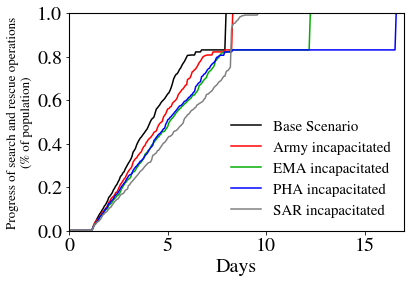

In [ ]:
scenarios=["base", "No_DoD", "No_FEMA", "No_DoH", "No_ARC"]
plot_variable(scenarios, 'output_df_data', 'DataCollector_DataCollecting_searchAndRescue_total', [0, 17, 0, 1], 'Progress of search and rescue operations\n(% of population)', ylablesize=13)
# plt.savefig('figures/sar1.png')

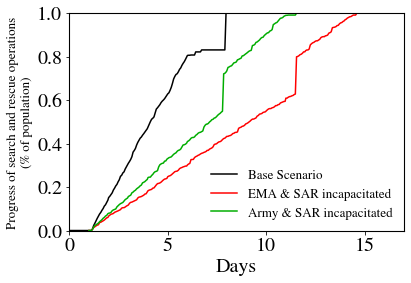

In [ ]:
scenarios=["base", "NO_EMA_SAR", "NO_Army_SAR"]
plot_variable(scenarios, 'output_df_data', 'DataCollector_DataCollecting_searchAndRescue_total', [0, 17, 0, 1], 'Progress of search and rescue operations\n(% of population)', ylablesize=13, legsize=13)

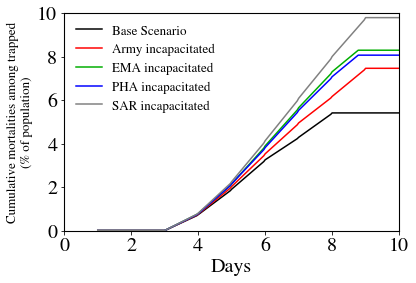

In [ ]:
plot_variable(scenarios, 'output_df_data', 'DataCollector_DataCollecting_people_to_die_total', [0, 10, 0, 10], 'Cumulative mortalities among trapped\n(% of population)', ylablesize=13, legsize=13)

## Debris Removal

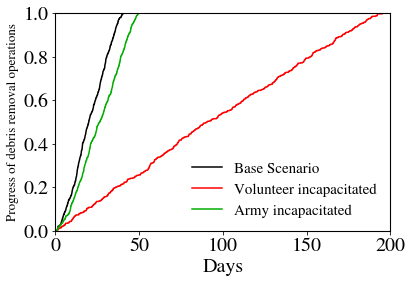

In [ ]:
labels = {"base": "Base Scenario", "No_DoD": "Volunteer incapacitated", "No_FEMA": "EMA incapacitated", "No_DoH": "PHA incapacitated",
          "No_ARC": "SAR incapacitated", "No_EPA": "EPA incapacitated", "No_DoE": "RUC incapacitated", "No_Cyb": "RTC incapacitated",
          "No_DoT": "RTA incapacitated", "No_DHS": "PSA incapacitated", "No_NVOAD": "Army incapacitated", "Ambulance_available": "Available",
          "Ambulance_busy": "Busy", "DataCollector_DataCollecting_transferred_patients_total": "Transferred",
          "DataCollector_DataCollecting_hospital_extra_demand_total": "Hospital extra demand",
          'Household_normal': 'Normal', 'Household_waiting_for_finance': 'Waiting for finance',
          'Household_waiting_for_construction': 'Waiting for construction'}
scenarios=["base", "No_DoD", "No_NVOAD"]
plot_variable(scenarios, 'output_df_data', 'DataCollector_DataCollecting_debrisRemoval_total', [0, 200, 0, 1], 'Progress of debris removal operations', ylablesize=13)

## Public Health

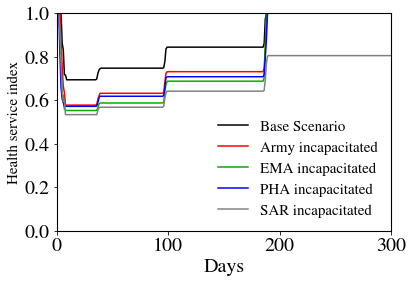

In [ ]:
labels = {"base": "Army incapacitated", "No_DoD": "Base Scenario", "No_FEMA": "EMA incapacitated", "No_DoH": "PHA incapacitated",
          "No_ARC": "SAR incapacitated", "No_EPA": "EPA incapacitated", "No_DoE": "RUC incapacitated", "No_Cyb": "RTC incapacitated",
          "No_DoT": "RTA incapacitated", "No_DHS": "PSA incapacitated", "No_NVOAD": "Volunteer incapacitated", "Ambulance_available": "Available",
          "Ambulance_busy": "Busy", "DataCollector_DataCollecting_transferred_patients_total": "Transferred",
          "DataCollector_DataCollecting_hospital_extra_demand_total": "Hospital extra demand",
          'Household_normal': 'Normal', 'Household_waiting_for_finance': 'Waiting for finance',
          'Household_waiting_for_construction': 'Waiting for construction'}

scenarios=["No_DoD", "base", "No_FEMA", "No_DoH", "No_ARC"]
plot_variable(scenarios, 'output_df_sd', 'statOfHealth', [0, 300, 0, 1], 'Health service index', ylablesize=15)

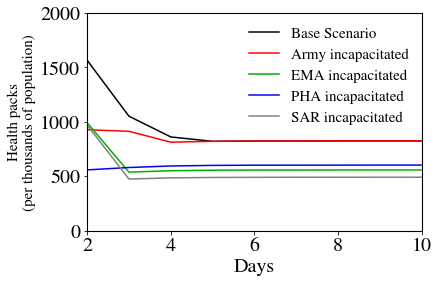

In [ ]:
plot_variable(scenarios, 'output_df_sd', 'healthResources', [2, 10, 0, 2000], 'Health packs\n(per thousands of population)', ylablesize=15)

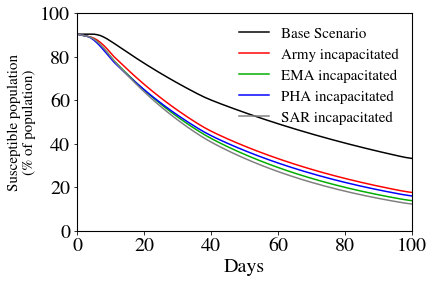

In [ ]:
plot_variable(scenarios, 'output_df_sd', 'popSuscToDeadlyDisease', [0, 100, 0, 100], 'Susceptible population\n(% of population)', ylablesize=15)

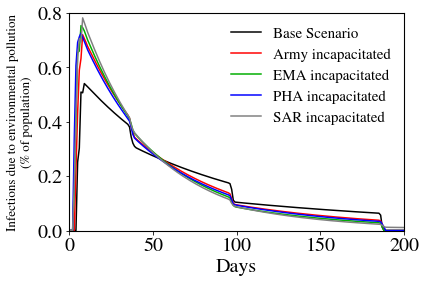

In [ ]:
plot_variable(scenarios, 'output_df_sd', 'envInfectionRate', [0, 200, 0, 0.8], 'Infections due to environmental pollution\n(% of population)', ylablesize=13)

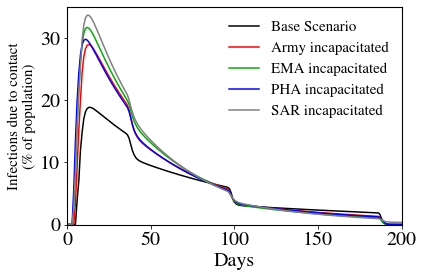

In [ ]:
plot_variable(scenarios, 'output_df_sd', 'infectionRate', [0, 200, 0, 35], 'Infections due to contact\n(% of population)', ylablesize=15)

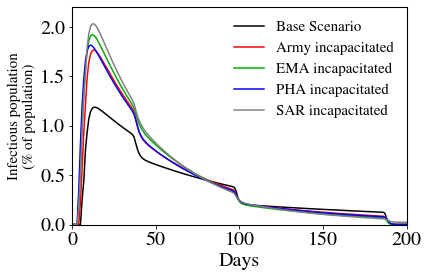

In [ ]:
plot_variable(scenarios, 'output_df_sd', 'popInfected', [0, 200, 0, 2.2], 'Infectious population\n(% of population)', ylablesize=15)

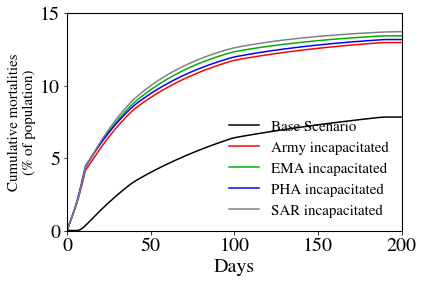

In [ ]:
plot_variable(scenarios, 'output_df_sd', 'dead', [0, 200, 0, 15], 'Cumulative mortalities\n(% of population)', ylablesize=15)

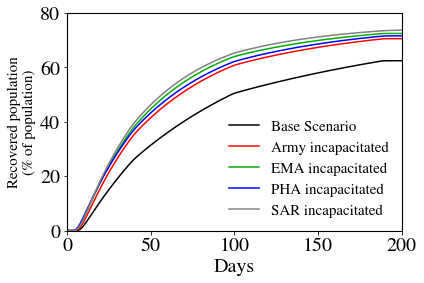

In [ ]:
plot_variable(scenarios, 'output_df_sd', 'recovered', [0, 200, 0, 80], 'Recovered population\n(% of population)', ylablesize=15)

## Security

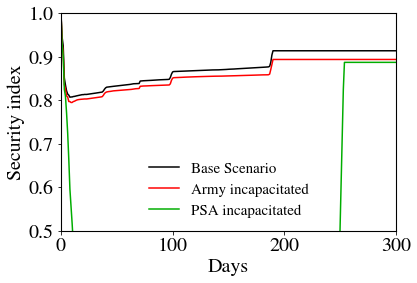

In [ ]:
labels = {"base": "Base Scenario", "No_DoD": "Army incapacitated", "No_FEMA": "EMA incapacitated", "No_DoH": "PHA incapacitated",
          "No_ARC": "SAR incapacitated", "No_EPA": "EPA incapacitated", "No_DoE": "RUC incapacitated", "No_Cyb": "RTC incapacitated",
          "No_DoT": "RTA incapacitated", "No_DHS": "PSA incapacitated", "No_NVOAD": "Volunteer incapacitated", "Ambulance_available": "Available",
          "Ambulance_busy": "Busy", "DataCollector_DataCollecting_transferred_patients_total": "Transferred",
          "DataCollector_DataCollecting_hospital_extra_demand_total": "Hospital extra demand",
          'Household_normal': 'Normal', 'Household_waiting_for_finance': 'Waiting for finance',
          'Household_waiting_for_construction': 'Waiting for construction', "NO_EMA_SAR": "EMA & SAR incapacitated", "NO_Army_SAR": "Army & SAR incapacitated"}

scenarios=["base", "No_DoD", "No_DHS"]
plot_variable(scenarios, 'output_df_sd', 'securityIndex', [0, 300, 0.5, 1], 'Security index')

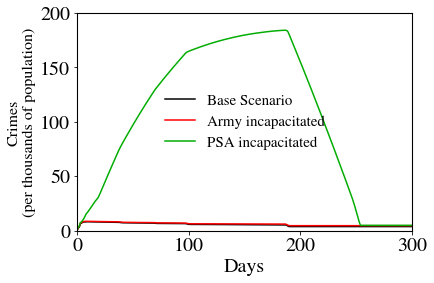

In [ ]:
plot_variable(scenarios, 'output_df_sd', 'crimes', [0, 300, 0, 200], 'Crimes\n(per thousands of population)', ylablesize=16)

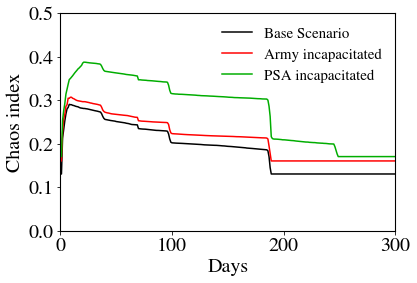

In [ ]:
plot_variable(scenarios, 'output_df_sd', 'chaosIndex', [0, 300, 0, 0.5], 'Chaos index')

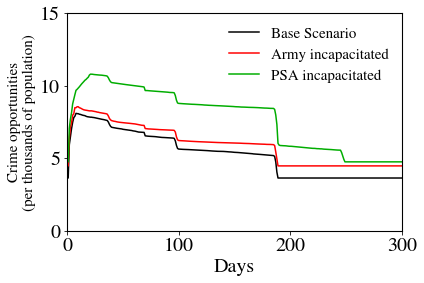

In [ ]:
plot_variable(scenarios, 'output_df_sd', 'crimeOpportunities', [0, 300, 0, 15], 'Crime opportunities\n(per thousands of population)', ylablesize=15)

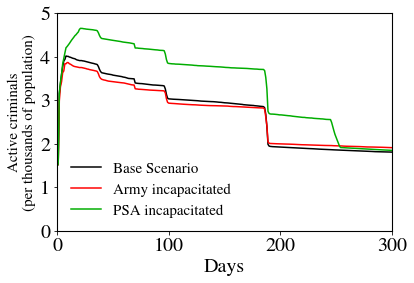

In [ ]:
plot_variable(scenarios, 'output_df_sd', 'activeCriminals', [0, 300, 0, 5], 'Active criminals\n(per thousands of population)', ylablesize=15)

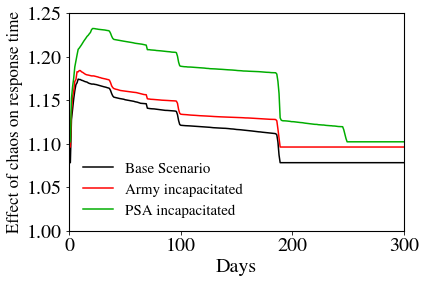

In [ ]:
plot_variable(scenarios, 'output_df_sd', 'effectOfChaosOnResponseTime', [0, 300, 1, 1.25], 'Effect of chaos on response time', ylablesize=17)

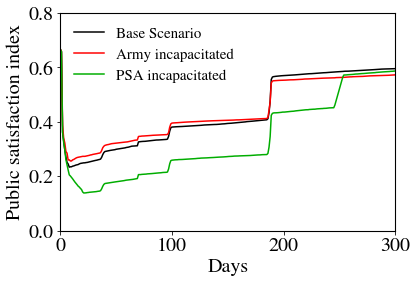

In [ ]:
plot_variable(scenarios, 'output_df_sd', 'publicSatisfaction', [0, 300, 0, 0.8], 'Public satisfaction index')

## Temporary Housing

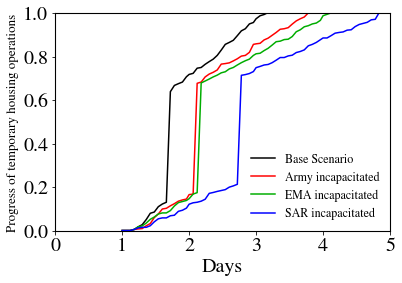

In [ ]:
scenarios=["base", "No_DoD", "No_FEMA", "No_ARC"]
plot_variable(scenarios, 'output_df_data', 'DataCollector_DataCollecting_housing_total', [0, 5, 0, 1], 'Progress of temporary housing operations', ylablesize=13, legsize=12)

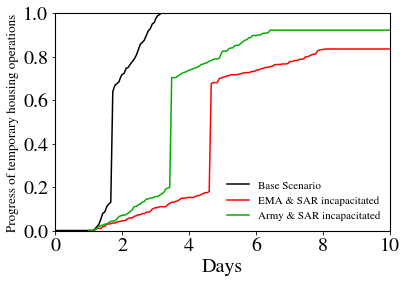

In [ ]:
scenarios=["base", "NO_EMA_SAR", "NO_Army_SAR"]
plot_variable(scenarios, 'output_df_data', 'DataCollector_DataCollecting_housing_total', [0, 10, 0, 1], 'Progress of temporary housing operations', ylablesize=13, legsize=11)

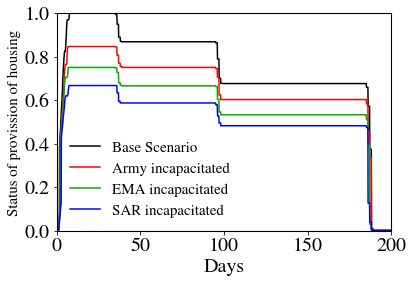

In [ ]:
plot_variable(scenarios, 'output_df_data', 'DataCollector_DataCollecting_housing_real_time_total', [0, 200, 0, 1], 'Status of provission of housing', ylablesize=15)

## Patient Transfer

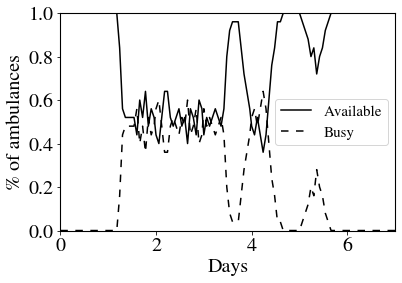

In [ ]:
scenarios = ["base"]
plot_base_variables(scenarios, 'output_df_states', ['Ambulance_available', 'Ambulance_busy'], [0, 7, 0, 1], '% of ambulances')

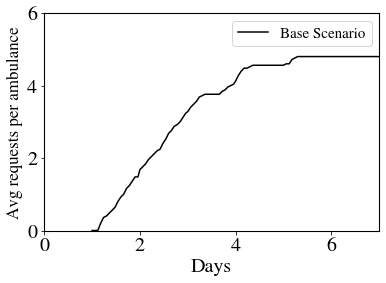

In [ ]:
plot_variable(scenarios, 'output_df_states', 'AmericanRedCross_available_n_received_ambulance_request_total', [0, 7, 0, 6], 'Avg requests per ambulance', ylablesize=17)

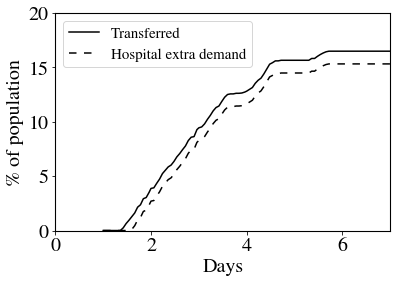

In [ ]:
plot_base_variables(scenarios, 'output_df_data', ['DataCollector_DataCollecting_transferred_patients_total', 'DataCollector_DataCollecting_hospital_extra_demand_total'], [0, 7, 0, 20], '% of population')

## Food and Water

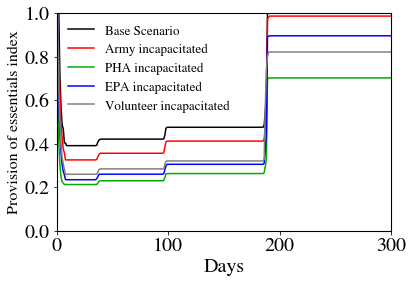

In [ ]:
labels = {"base": "Army incapacitated", "No_DoD": "Base Scenario", "No_FEMA": "EMA incapacitated", "No_DoH": "PHA incapacitated",
          "No_ARC": "SAR incapacitated", "No_EPA": "EPA incapacitated", "No_DoE": "RUC incapacitated", "No_Cyb": "RTC incapacitated",
          "No_DoT": "RTA incapacitated", "No_DHS": "PSA incapacitated", "No_NVOAD": "Volunteer incapacitated", "Ambulance_available": "Available",
          "Ambulance_busy": "Busy", "DataCollector_DataCollecting_transferred_patients_total": "Transferred",
          "DataCollector_DataCollecting_hospital_extra_demand_total": "Hospital extra demand",
          'Household_normal': 'Normal', 'Household_waiting_for_finance': 'Waiting for finance',
          'Household_waiting_for_construction': 'Waiting for construction'}

scenarios=["No_DoD", "base", "No_DoH", "No_EPA", "No_NVOAD"]
plot_variable(scenarios, 'output_df_sd', 'statOfFood', [0, 300, 0, 1], 'Provision of essentials index', ylablesize=16, legsize=13)

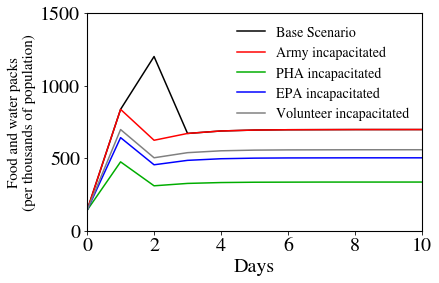

In [ ]:
plot_variable(scenarios, 'output_df_sd', 'foodAndWater', [0, 10, 0, 1500], 'Food and water packs\n(per thousands of population)', ylablesize=15, legsize=14)

# **Disaster Recovery**

## Critical Facilities Restoration

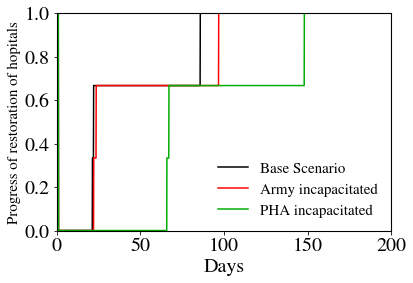

In [ ]:
labels = {"base": "Army incapacitated", "No_DoD": "Base Scenario", "No_FEMA": "EMA incapacitated", "No_DoH": "PHA incapacitated",
          "No_ARC": "SAR incapacitated", "No_EPA": "EPA incapacitated", "No_DoE": "RUC incapacitated", "No_Cyb": "RTC incapacitated",
          "No_DoT": "RTA incapacitated", "No_DHS": "PSA incapacitated", "No_NVOAD": "Volunteer incapacitated", "Ambulance_available": "Available",
          "Ambulance_busy": "Busy", "DataCollector_DataCollecting_transferred_patients_total": "Transferred",
          "DataCollector_DataCollecting_hospital_extra_demand_total": "Hospital extra demand",
          'Household_normal': 'Normal', 'Household_waiting_for_finance': 'Waiting for finance',
          'Household_waiting_for_construction': 'Waiting for construction'}

scenarios = ["No_DoD", "base", "No_DoH"]
plot_variable(scenarios, 'output_df_data', 'DataCollector_DataCollecting_restored_hospital_total', [0, 200, 0, 1], 'Progress of restoration of hopitals', ylablesize=15)

## Inspection of Infrastructures and Lifelines

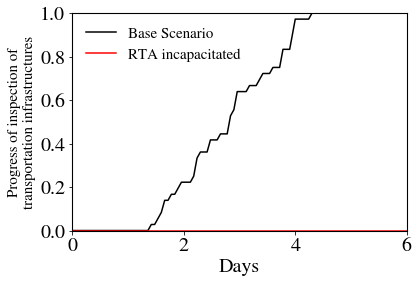

In [ ]:
labels = {"base": "Base Scenario", "No_DoD": "Army incapacitated", "No_FEMA": "EMA incapacitated", "No_DoH": "PHA incapacitated",
          "No_ARC": "SAR incapacitated", "No_EPA": "EPA incapacitated", "No_DoE": "RUC incapacitated", "No_Cyb": "RTC incapacitated",
          "No_DoT": "RTA incapacitated", "No_DHS": "PSA incapacitated", "No_NVOAD": "Volunteer incapacitated", "Ambulance_available": "Available",
          "Ambulance_busy": "Busy", "DataCollector_DataCollecting_transferred_patients_total": "Transferred",
          "DataCollector_DataCollecting_hospital_extra_demand_total": "Hospital extra demand",
          'Household_normal': 'Normal', 'Household_waiting_for_finance': 'Waiting for finance',
          'Household_waiting_for_construction': 'Waiting for construction'}

scenarios=["base", "No_DoT"]
plot_variable(scenarios, 'output_df_data', 'DataCollector_DataCollecting_assessed_transportation_total', [0, 6, 0, 1], 'Progress of inspection of\ntransportation infrastructures', ylablesize=15)

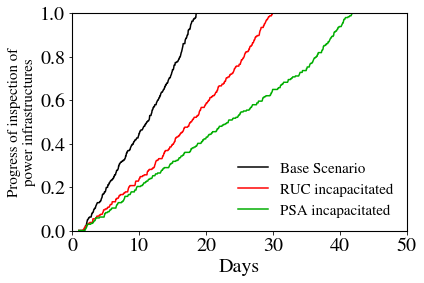

In [ ]:
scenarios=["base", "No_DoE", "No_DHS"]
plot_variable(scenarios, 'output_df_data', 'DataCollector_DataCollecting_assessed_power_total', [0, 50, 0, 1], 'Progress of inspection of\npower infrastructures', ylablesize=15)

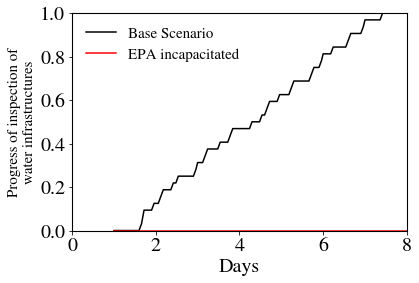

In [ ]:
scenarios=["base", "No_EPA"]
plot_variable(scenarios, 'output_df_data', 'DataCollector_DataCollecting_assessed_water_total', [0, 8, 0, 1], 'Progress of inspection of\nwater infrastructures', ylablesize=15)

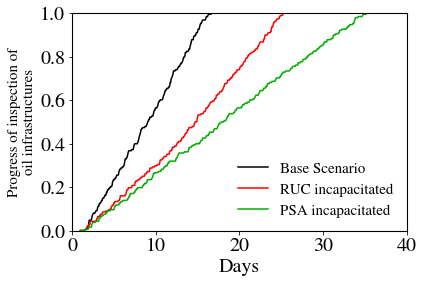

In [ ]:
scenarios=["base", "No_DoE", "No_DHS"]
plot_variable(scenarios, 'output_df_data', 'DataCollector_DataCollecting_assessed_oil_total', [0, 40, 0, 1], 'Progress of inspection of\noil infrastructures', ylablesize=15)

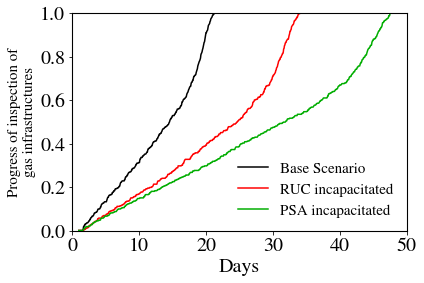

In [ ]:
scenarios=["base", "No_DoE", "No_DHS"]
plot_variable(scenarios, 'output_df_data', 'DataCollector_DataCollecting_assessed_gas_total', [0, 50, 0, 1], 'Progress of inspection of\ngas infrastructures', ylablesize=15)

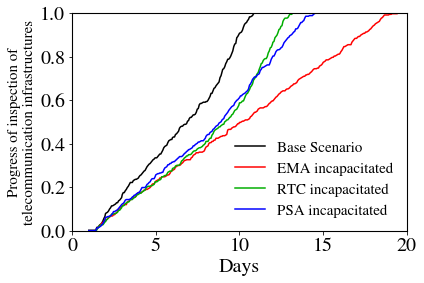

In [ ]:
scenarios=["base", "No_FEMA", "No_Cyb", "No_DHS"]
plot_variable(scenarios, 'output_df_data', 'DataCollector_DataCollecting_assessed_communication_total', [0, 20, 0, 1], 'Progress of inspection of\ntelecommunication infrastructures', ylablesize=15)

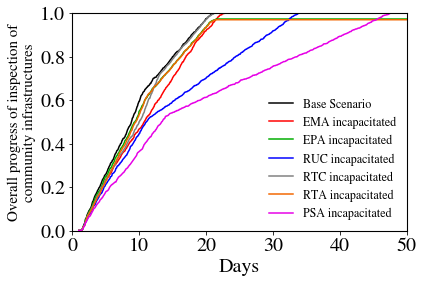

In [ ]:
scenarios=["base", "No_FEMA", "No_EPA", "No_DoE", "No_Cyb", "No_DoT", "No_DHS"]
plot_variable(scenarios, 'output_df_data', 'DataCollector_DataCollecting_total_assessed_lifelines_total', [0, 50, 0, 1], 'Overall progress of inspection of\ncommunity infrastructures', ylablesize=15, legsize=12)

## Household Recovery

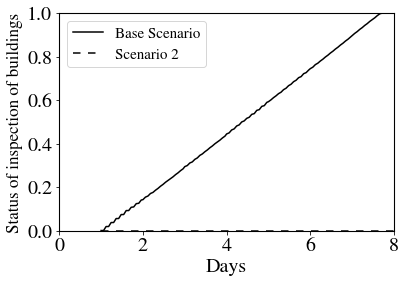

In [ ]:
scenarios=["base", "No_FEMA"]
plot_variable(scenarios, 'output_df_data', 'DataCollector_DataCollecting_assessed_building_total', [0, 8, 0, 1], 'Status of inspection of buildings', ylablesize=17)

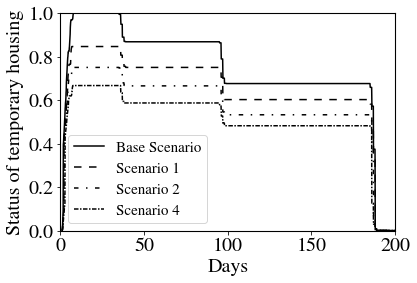

In [ ]:
scenarios=["base", "No_DoD", "No_FEMA", "No_ARC"]
plot_variable(scenarios, 'output_df_data', 'DataCollector_DataCollecting_housing_real_time_total', [0, 200, 0, 1], 'Status of temporary housing')

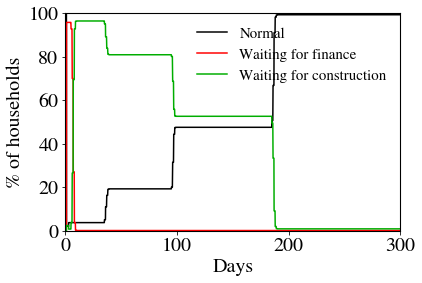

In [ ]:
scenarios=['base']
plot_base_variables(scenarios, 'output_df_states', ['Household_normal', 'Household_waiting_for_finance', 'Household_waiting_for_construction'], [0, 300, 0, 100], '% of households', legsize=15)

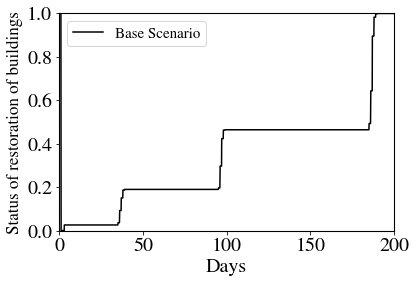

In [ ]:
scenarios=["base"]
plot_variable(scenarios, 'output_df_data', 'DataCollector_DataCollecting_restored_building_total', [0, 200, 0, 1], 'Status of restoration of buildings', ylablesize=17)

## Restoration of Infrastructures and Lifelines

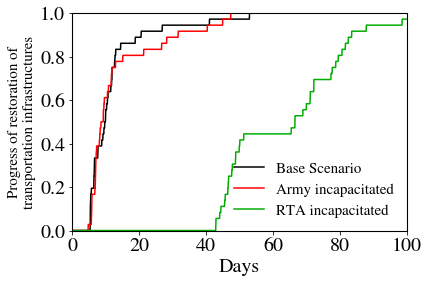

In [ ]:
scenarios=["base", "No_DoD", "No_DoT"]
plot_variable(scenarios, 'output_df_data', 'DataCollector_DataCollecting_restored_transportation_total', [0, 100, 0, 1], 'Progress of restoration of\ntransportation infrastructures', ylablesize=15)

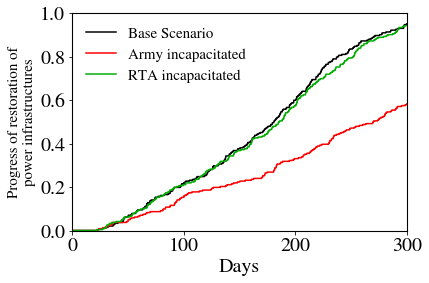

In [ ]:
scenarios=["base", "No_DoD", "No_DoT"]
plot_variable(scenarios, 'output_df_data', 'DataCollector_DataCollecting_restored_power_total', [0, 300, 0, 1], 'Progress of restoration of\npower infrastructures', ylablesize=15)

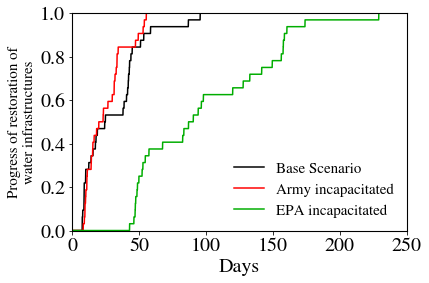

In [ ]:
scenarios=["base", "No_DoD", "No_EPA"]
plot_variable(scenarios, 'output_df_data', 'DataCollector_DataCollecting_restored_water_total', [0, 250, 0, 1], 'Progress of restoration of\nwater infrastructures', ylablesize=15)

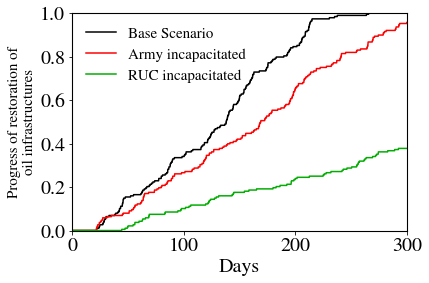

In [ ]:
scenarios=["base", "No_DoD", "No_DoE"]
plot_variable(scenarios, 'output_df_data', 'DataCollector_DataCollecting_restored_oil_total', [0, 300, 0, 1], 'Progress of restoration of\noil infrastructures', ylablesize=15)

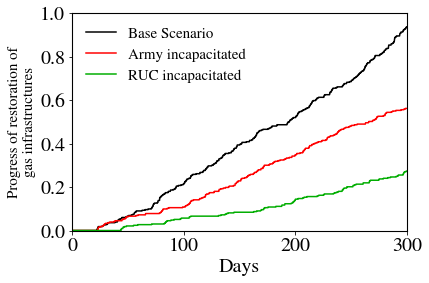

In [ ]:
scenarios=["base", "No_DoD", "No_DoE"]
plot_variable(scenarios, 'output_df_data', 'DataCollector_DataCollecting_restored_gas_total', [0, 300, 0, 1], 'Progress of restoration of\ngas infrastructures', ylablesize=15)

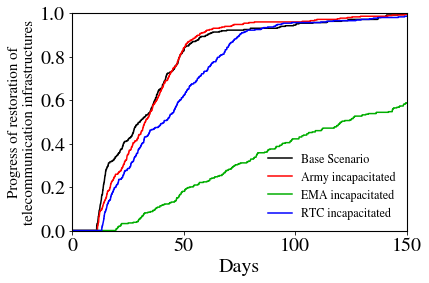

In [ ]:
scenarios=["base", "No_DoD", "No_FEMA", "No_Cyb"]
plot_variable(scenarios, 'output_df_data', 'DataCollector_DataCollecting_restored_communication_total', [0, 150, 0, 1], 'Progress of restoration of\ntelecommunication infrastructures', ylablesize=15, legsize=12)

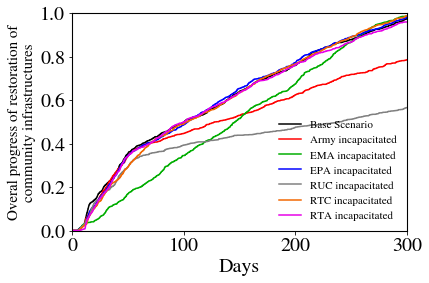

In [ ]:
scenarios=["base", "No_DoD", "No_FEMA", "No_EPA", "No_DoE", "No_Cyb", "No_DoT"]
plot_variable(scenarios, 'output_df_data', 'DataCollector_DataCollecting_total_restored_lifelines_total', [0, 300, 0, 1], 'Overal progress of restoration of\ncommunity infrastructures', ylablesize=15, legsize=11)